# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data/text

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
# ------------- #
# Local Imports #
# ------------- #

# importing sys
import sys

# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')

# env containing sensitive access credentials
import env
from env import user, password, host
from env import get_db_url


In [2]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
ADDITIONAL_STOPWORDS = [] #['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
# basic cleaning function:
# ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

# def clean(text):
#     '''Simplified text cleaning function'''
#     stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
#     text = text.lower()
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     words = re.sub(r"[^a-z0-9\s]", '', text)
#     return [word for word in words if word not in stopwords]

In [5]:
# acquire data from spam_db

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

### If we look at this in the context of a classification problem,
we may ask:
 - What leads to a spam text?
 - What leads to a ham text?
 

In [7]:
df.iloc[1].text

'Ok lar... Joking wif u oni...'

In [8]:
# recall how the string method join operates -- glues together 
# all instances inside of a iterable using whatever is specified
# ahead of the method call:
# english: glue these words together with a empty space
' '.join(['this ', 'is ', 'a ', 'list of strings'])

'this  is  a  list of strings'

In [9]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [10]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 

In [11]:
#ham_words

In [12]:
len(all_words), len(spam_words), len(ham_words)

(52331, 12505, 39826)

In [13]:
# df[df.label == 'ham']['text']

In [14]:
# ham_words

In [15]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [16]:
spam_freq.head()

call    359
free    216
2       173
u       155
txt     150
dtype: int64

In [17]:
ham_freq.head(5)

u       1027
im       449
get      314
2        305
ltgt     276
dtype: int64

## Exploration

Represent text as word frequencies.

In [18]:
# concat all frequencies together into a dataframe

In [19]:
# lets join these words together into a dataframe based 
# on my frequency series:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,449,13,462
get,314,83,397
2,305,173,478
ltgt,276,0,276


In [20]:
word_counts.sample(5).head()

,ham,spam,all
forwarding,1,0,1
offline,1,0,1
ruining,2,0,2
jstfrnd,3,0,3
anybody,5,0,5


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

In [21]:
# sort by 'all'

word_counts.sort_values('all', ascending=False)

,ham,spam,all
u,1027,155,1182
call,241,359,600
2,305,173,478
im,449,13,462
get,314,83,397
...,...,...,...
smokin,1,0,1
dled,1,0,1
canlove,1,0,1
thekingshead,1,0,1


In [22]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['ham','spam', 'all'], ascending=False)

,ham,spam,all
u,1027,155,1182
im,449,13,462
get,314,83,397
2,305,173,478
ltgt,276,0,276
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

<AxesSubplot:>

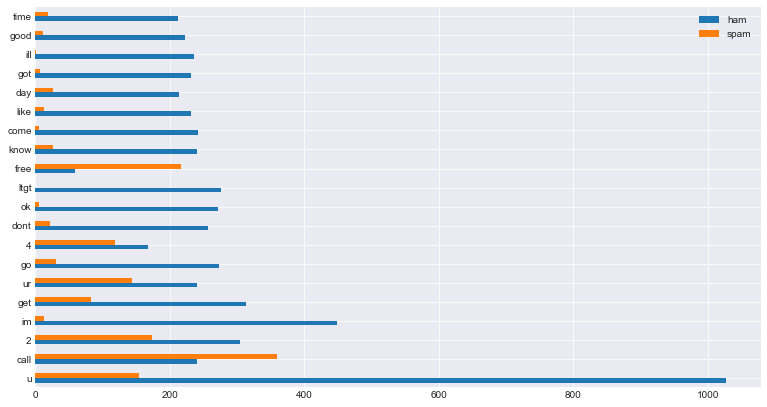

In [23]:
# plt.rc('font', size=18)
word_counts.sort_values(
    'all', ascending=False
)[['ham','spam']].head(20).plot.barh()

In [24]:
word_counts.sort_values('all', ascending=False)\
 .head(20)\
 .apply(lambda row: row/row['all'], axis = 1)

,ham,spam,all
u,0.868866,0.131134,1.0
call,0.401667,0.598333,1.0
2,0.638075,0.361925,1.0
im,0.971861,0.028139,1.0
get,0.790932,0.209068,1.0
ur,0.625000,0.375000,1.0
go,0.898026,0.101974,1.0
4,0.585366,0.414634,1.0
dont,0.921147,0.078853,1.0
ok,0.981949,0.018051,1.0


<Figure size 1152x648 with 0 Axes>

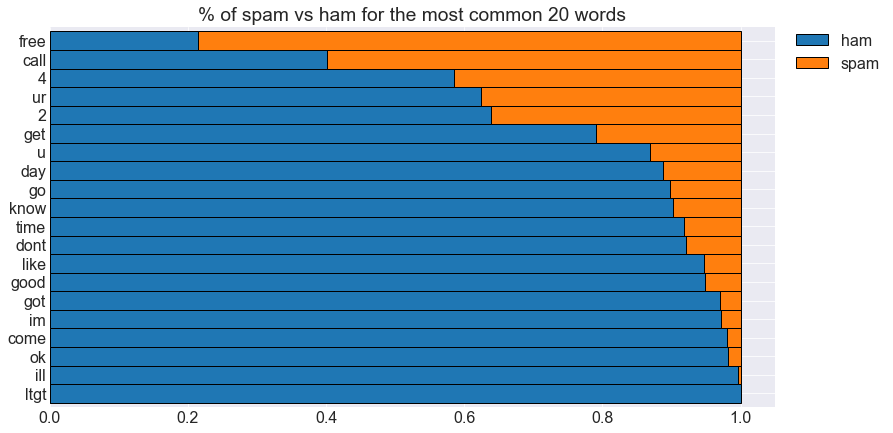

In [25]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

In [26]:
sentence = 'Today is tuesday ! ! ! and the weather is nice .'

In [27]:
list(nltk.bigrams(sentence.split()))

[('Today', 'is'),
 ('is', 'tuesday'),
 ('tuesday', '!'),
 ('!', '!'),
 ('!', '!'),
 ('!', 'and'),
 ('and', 'the'),
 ('the', 'weather'),
 ('weather', 'is'),
 ('is', 'nice'),
 ('nice', '.')]

**Be Careful!** Make sure you are making bigrams out of *words*.

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

In [28]:
list(nltk.ngrams(sentence.split(), 3))

[('Today', 'is', 'tuesday'),
 ('is', 'tuesday', '!'),
 ('tuesday', '!', '!'),
 ('!', '!', '!'),
 ('!', '!', 'and'),
 ('!', 'and', 'the'),
 ('and', 'the', 'weather'),
 ('the', 'weather', 'is'),
 ('weather', 'is', 'nice'),
 ('is', 'nice', '.')]

<AxesSubplot:>

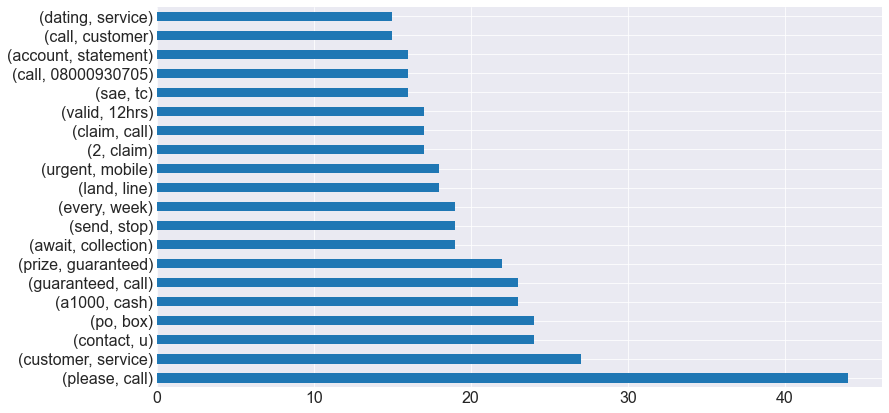

In [29]:
pd.Series(nltk.bigrams(spam_words)
         ).value_counts().head(20).plot.barh()

## Word Cloud

`python -m pip install --upgrade wordcloud`

documentation: https://amueller.github.io/word_cloud/

In [30]:
!python -m pip install --upgrade wordcloud

In [31]:
from wordcloud import WordCloud

In [32]:
# ' '.join(ham_words)

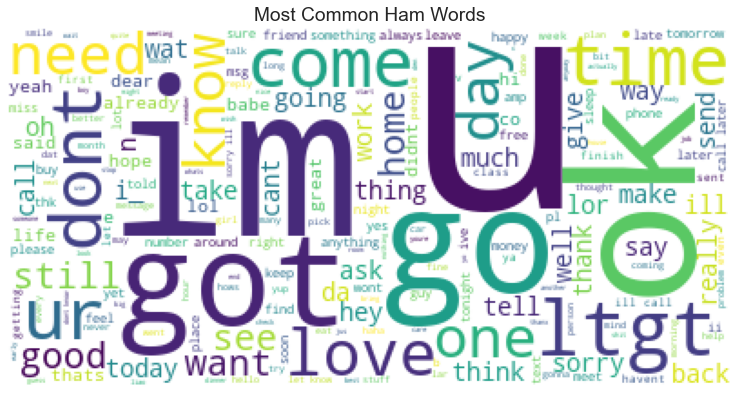

In [33]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

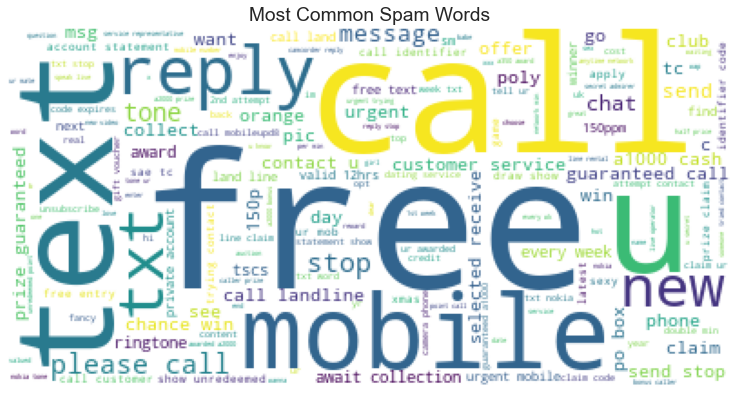

In [34]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [35]:
# add two new columns 'message_length' 
# and 'word_count'

In [36]:
df['message_length'] = df['text'].str.len()

In [37]:
# consider running a t_test_ind
# spam vs ham message length

In [38]:
# we apply our clean function, apply len chained on it
# if we did not want to clean this before
# word count, we would want to do a split on it
df['word_count'] = \
df.text.apply(clean).apply(len)

In [39]:
df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,23
3,ham,U dun say so early hor... U c already then say...,49,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8


## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - combination of qualitative and quantitative methods
    - then empirically validate
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([github](https://github.com/cjhutto/vaderSentiment) + [whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)) `nltk.sentiment.vader.SentimentIntensityAnalyzer`. Pre-trained sentiment analyzer (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).)


From your terminal:
`python -c 'import nltk;nltk.download("vader_lexicon")'`

In [40]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object
sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('He is really good')

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

In [41]:
sia.polarity_scores('He is really good!!!')

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.6211}

In [42]:
sia.polarity_scores('He is REALLY good')

{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6028}

In [43]:
sia.polarity_scores('He is very good!!!')

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.6211}

In [44]:
sia.polarity_scores(
    'The food is good but service is slow')

{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.2382}

In [45]:
sia.polarity_scores('He is good :-)')

{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.6369}

In [46]:
sia.polarity_scores('she is vegan :/')

{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}

In [47]:
sia.polarity_scores('I hate you')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [48]:
sia.polarity_scores('I hate you :)')

{'neg': 0.481, 'neu': 0.13, 'pos': 0.39, 'compound': -0.1779}

In [49]:
sia.polarity_scores('I hate hate speech')

{'neg': 0.881, 'neu': 0.119, 'pos': 0.0, 'compound': -0.8126}

Things that can influence Sentiment Score:
1. Punctuations. Can increase the intensity
2. Capitalization. Can increase the intensity
3. Degree modifiers
4. Conjunctions

It can handle Emojis and slangs

Apply this to the text message data

In [50]:
# grab the sentiment from each of the texts as they stand:
# apply a lambda function on each cell in the text column:
# polarity_score's value associtated with the "compound"
# key for each score
df['sentiment'] = df['text'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,label,text,message_length,word_count,sentiment
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,23,0.7964
3,ham,U dun say so early hor... U c already then say...,49,9,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8,-0.1027


In [51]:
# is the mean and median values of sentiment score different for ham vs spam?
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


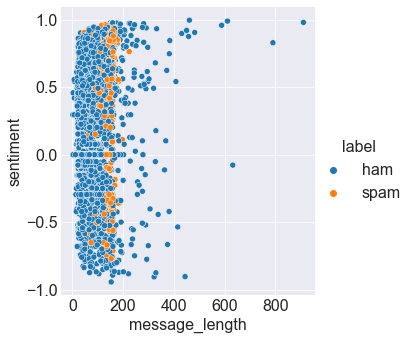

In [52]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', 
            y = 'sentiment', hue = 'label')

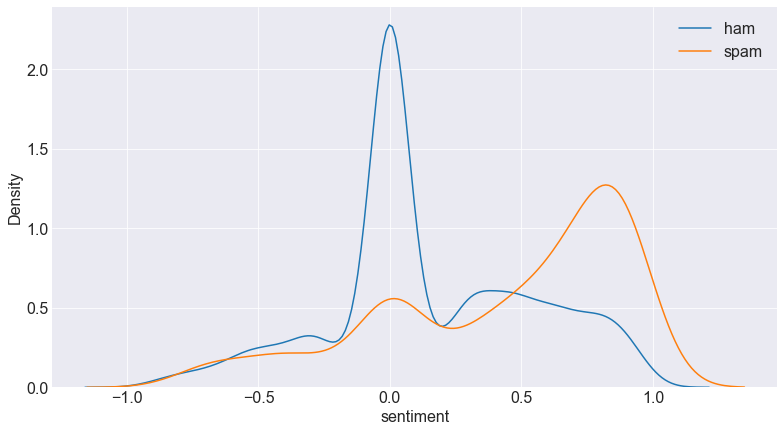

In [53]:
# is the distribution for sentiment different for ham vs spam
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
plt.legend(['ham', 'spam'])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

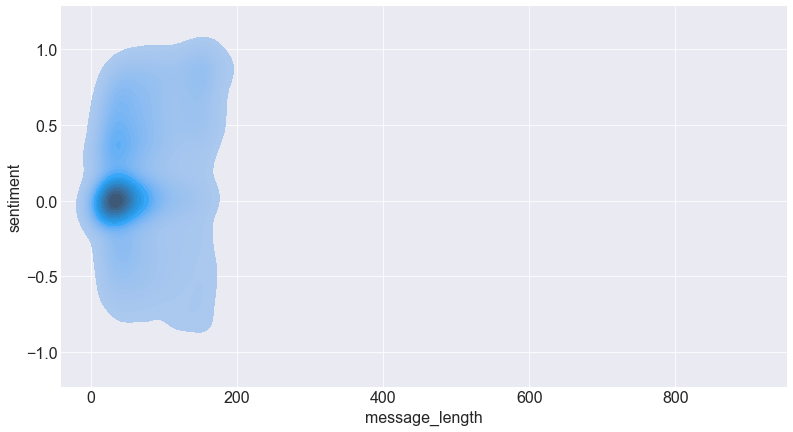

In [54]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    df[df.label == 'ham'].message_length,
    df[df.label == 'ham'].sentiment, 
    levels = 30, shade = True );
sns.kdeplot(
            levels = 30, shade = True, alpha = 0.5 )

### Takeaways:
 - Spam messages seem to have roughly the same message length, where ham varies a lot.
 - Spam messages have a very positive sentiment
 - If we wanted to utilize these features for modeling, we would want to proceed forward with means testing to establish their viability

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)